In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import random
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from math import e,sqrt,sin,cos
from sklearn.datasets import make_gaussian_quantiles

question 1

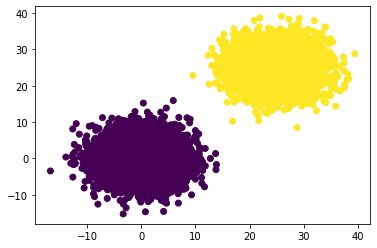

In [42]:
#make 2D dataset with guassian distribution(diff mean,same cov)
x1= random.normal(loc=0, scale=4, size=(5000,2))
x2=random.normal(loc=25, scale=4, size=(5000,2))

first_dim = {'x1':x1[:,0],'x2':x1[:,1],'class':0}
f_d = pd.DataFrame(first_dim)
second_dim = {'x1':x2[:,0],'x2':x2[:,1],'class':1}
s_d = pd.DataFrame(second_dim)
ds = [f_d,s_d]
ds= pd.concat(ds)

#shuffle data
ds = ds.sample(frac=1).reset_index()
ds.drop('index',axis=1, inplace=True)

#plot data
plt.scatter(ds['x1'],ds['x2'],c= ds['class'] )

In [43]:
X= ds.iloc[:, 0:2]
y = ds.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.1, random_state = 0)
X_train.shape

(7200, 2)

In [5]:
y_train.shape

(720,)

In [44]:
#define perceptrone with 3 diff activation function:
def predict_activation(test, weights, activation_func):
    predictions = list()
    for row in test:
      activation = weights[0]
      for i in range(len(row) - 1):
          activation += weights[i + 1] * row[i]
      temp = 0
      #relu
      if activation_func == 1:
        if activation >= 0.0 : temp = 1
        predictions.append(temp)
      #sigmoid
      elif activation_func == 2:
        temp = np.exp(-activation)/(np.exp(-activation)+1)**2
        if temp > 0.0 : temp = 1
        elif temp <= 0.0 : temp = 0
        predictions.append(temp)
      #softmax
      elif activation_func == 3:
        exps = np.exp(activation - activation.max())
        predictions.append(exps / np.sum(exps, axis=0))
    return predictions

#perceptron
def train_weights_perceptron(train,validate, l_rate, max_epoch, activation_func):
    weights = [0.0 for i in range(len(train[0]))]
    accuracy_train = [0]
    accuracy_validate = [0]
    flag = True
    epoch = 0
    convergence = 0
    while flag:
      p_train = list()
      for row in train:
          prediction = predict_activation([row], weights, activation_func)[0]
          p_train.append(prediction)
          error = row[-1] - prediction
          weights[0] = weights[0] + l_rate * error
          for i in range(len(row) - 1):
              weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
      accuracy_train.append(accuracy_score(train[:,-1],p_train)*100)
      accuracy_validate.append(accuracy_score(validate[:,-1], predict_activation(validate,weights, activation_func))*100)

      if abs(accuracy_train[-1]-accuracy_train[-2])<3 : 
        convergence+=1

      if epoch >= max_epoch :
        flag = False
      else : epoch +=1
    return weights, accuracy_train,accuracy_validate

def perceptron(train,validate, test, l_rate, max_epoch, activation_func):
    weights , accuracy_train,accuracy_validate = train_weights_perceptron(train,validate, l_rate, max_epoch, activation_func)
    predictions = predict_activation(test, weights, activation_func)
    return predictions , accuracy_train,accuracy_validate
def loss (accuracy):
  error=list()
  for item in accuracy:
    error.append(100-item)
  return error

def plotting(temp , value1, value2 , label1, label2, title):
  plt.plot(temp ,value1, label=label1)
  plt.plot(temp ,value2,label=label2)
  plt.legend()
  plt.title(title)
  plt.show()

products_list = ds.values.tolist()
train, validate, test = np.split(products_list, [int(.7*len(products_list)), int(.8*len(products_list))])

Accuracy on test data = 100.0 and learninf rate is : 0.01


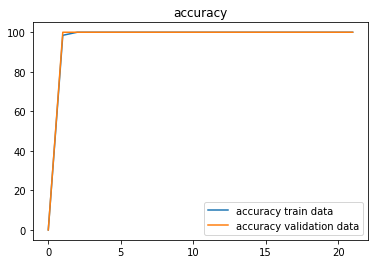

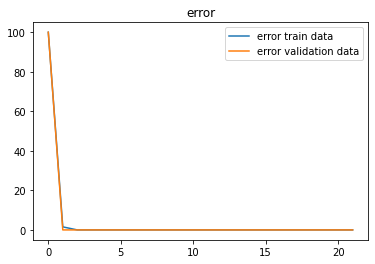

In [55]:
activation_func = 1
l_rate = 0.01
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print('Accuracy on test data = ' + str(accuracy*100) + ' and learninf rate is : '+str(l_rate))
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 100.0


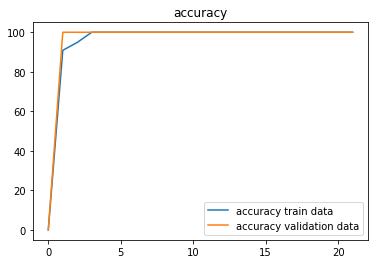

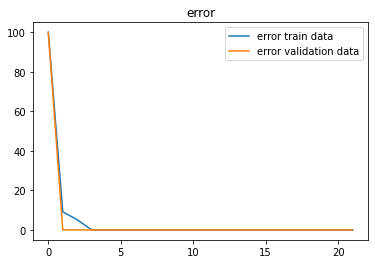

In [ ]:
activation_func = 1
l_rate = 0.0001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 49.85


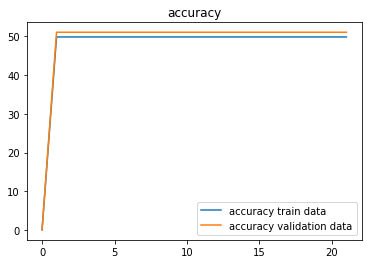

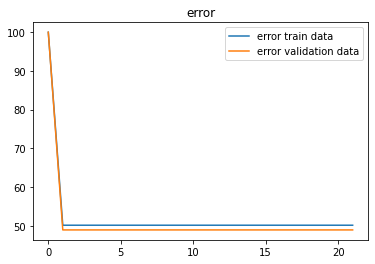

In [53]:
activation_funcvation_funcvation_funcvation_funcvation_func = 1
l_rate = 0.001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


Accuracy on test data = 49.85 and learninf rate is : 1e-05


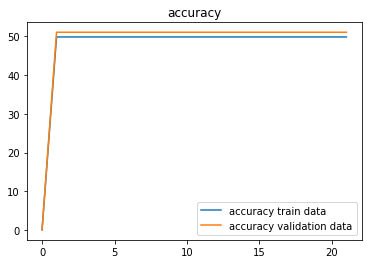

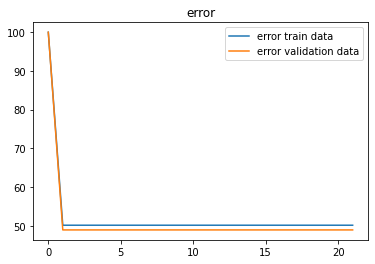

In [46]:
activation_func = 2
l_rate = 0.00001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print('Accuracy on test data = ' + str(accuracy*100) + ' and learninf rate is : '+str(l_rate))
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 100.0


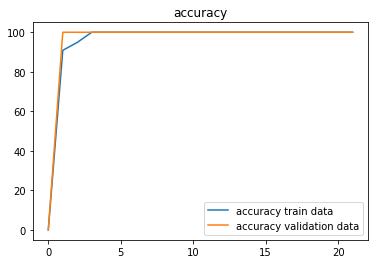

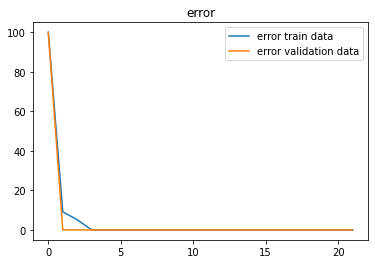

In [ ]:
activation_func = 2
l_rate = 0.01
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 52.5


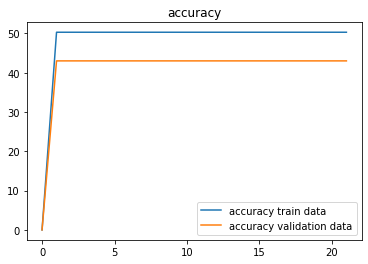

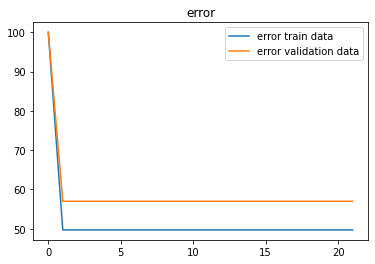

In [ ]:
activation_func = 2
l_rate = 0.001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


Accuracy on test data = 49.85 and learninf rate is : 0.001


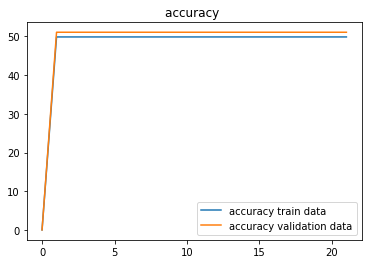

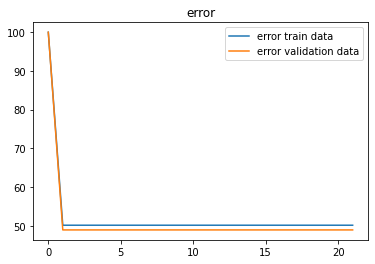

In [48]:
activation_func = 3
l_rate = 0.001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print('Accuracy on test data = ' + str(accuracy*100) + ' and learninf rate is : '+str(l_rate))
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy ' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 52.5


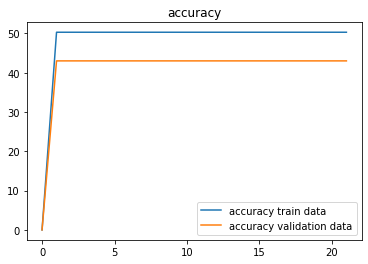

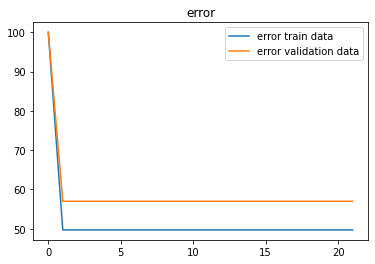

In [ ]:
activation_func = 3
l_rate = 0.01
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


 Accuracy on test data = 52.5


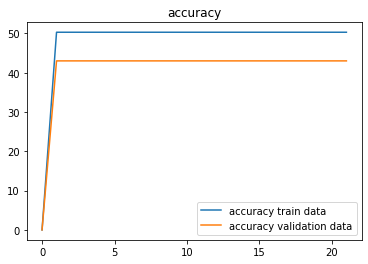

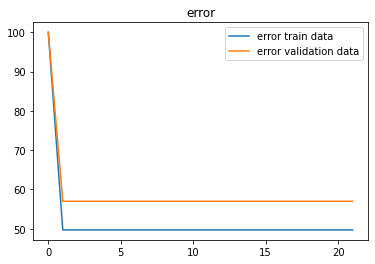

In [ ]:
activation_func = 3
l_rate = 0.001
perceptron_max_epoch = 20
predicted_perceptron, perceptron_accuracy_train, perceptron_accuracy_validate = perceptron(train,validate, test ,l_rate,perceptron_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_perceptron)
print(' Accuracy on test data = ' + str(accuracy*100) )
temp = [i for i in range(len(perceptron_accuracy_train))]
perceptron_error_train = loss(perceptron_accuracy_train)
perceptron_error_validate = loss(perceptron_accuracy_validate)
plotting(temp, perceptron_accuracy_train, perceptron_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp,perceptron_error_train, perceptron_error_validate, 'error train data', 'error validation data', 'error' )


In [56]:
def train_weights_adaline(train,validate, l_rate, max_epoch, activation_func):
    weights = [0.0 for i in range(len(train[0]))]
    accuracy_train = [0]
    accuracy_validate = [0]
    flag = True
    epoch = 0
    convergence = 0
    while flag:
      p_train = list()
      for row in train:
          activation = weights[0]
          for i in range(len(row) - 1):
              activation += weights[i + 1] * row[i]
          error = row[-1] - activation
          
          weights[0] = weights[0] + l_rate * error
          prediction = predict_activation([row], weights, activation_func)[0]
          if (row[-1]-prediction) != 0:
            for i in range(len(row) - 1):
              weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
          
          p_train.append(prediction)
      accuracy_train.append(accuracy_score(train[:,-1],p_train)*100)
      accuracy_validate.append(accuracy_score(validate[:,-1], predict_activation(validate,weights, activation_func))*100)

      if abs(accuracy_train[-1]-accuracy_train[-2])<3 : 
        convergence+=1

      if epoch >= max_epoch :
        flag = False
      else : epoch +=1

    return weights, accuracy_train,accuracy_validate

def adaline(train,validate, test, l_rate, max_epoch, activation_func):
    weights , accuracy_train,accuracy_validate = train_weights_adaline(train,validate, l_rate, max_epoch, activation_func)
    predictions = predict_activation(test, weights, activation_func)
    return predictions , accuracy_train,accuracy_validate




Accuracy on test data = 49.85 and learninf rate is : 0.02


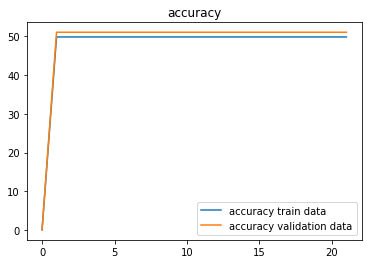

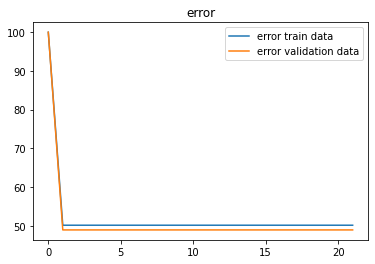

In [62]:
activation_func = 3
l_rate = 0.02
adaline_max_epoch = 20
predicted_adaline, adaline_accuracy_train,adaline_accuracy_validate = adaline(train,validate, test ,l_rate,adaline_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_adaline)
print('Accuracy on test data = ' + str(accuracy*100) + ' and learninf rate is : '+str(l_rate))
temp = [i for i in range(len(adaline_accuracy_train))]
adaline_error_train = loss(adaline_accuracy_train)
adaline_error_validate = loss(adaline_accuracy_validate)
plotting(temp, adaline_accuracy_train, adaline_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp, adaline_error_train, adaline_error_validate, 'error train data', 'error validation data', 'error' )

--------------------
Final Accuracy test data = 100.0


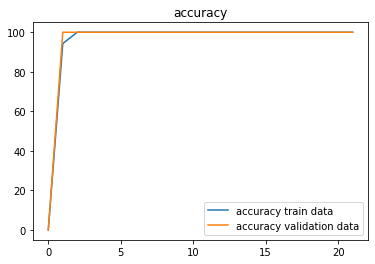

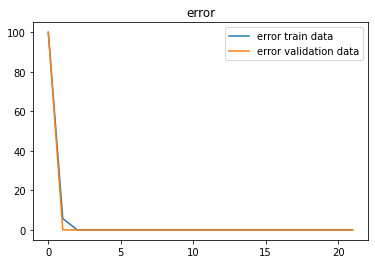

In [ ]:
activation_func = 1
l_rate = 0.01
adaline_max_epoch = 20
predicted_adaline, adaline_accuracy_train,adaline_accuracy_validate = adaline(train,validate, test ,l_rate,adaline_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_adaline)
print("--------------------")
print('Final Accuracy test data = ' + str(accuracy*100) )
temp = [i for i in range(len(adaline_accuracy_train))]
adaline_error_train = loss(adaline_accuracy_train)
adaline_error_validate = loss(adaline_accuracy_validate)
plotting(temp, adaline_accuracy_train, adaline_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp, adaline_error_train, adaline_error_validate, 'error train data', 'error validation data', 'error' )

--------------------
Final Accuracy test data = 52.5


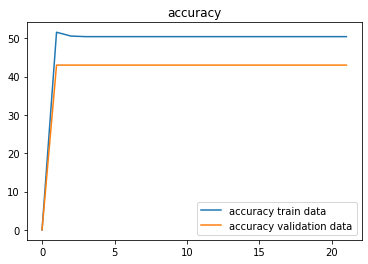

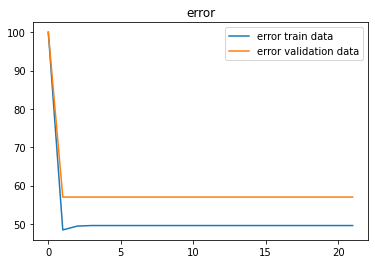

In [ ]:
activation_func = 1
l_rate = 0.001
adaline_max_epoch = 20
predicted_adaline, adaline_accuracy_train,adaline_accuracy_validate = adaline(train,validate, test ,l_rate,adaline_max_epoch, activation_func)
accuracy = accuracy_score(test[:,-1], predicted_adaline)
print("--------------------")
print('Final Accuracy test data = ' + str(accuracy*100) )
temp = [i for i in range(len(adaline_accuracy_train))]
adaline_error_train = loss(adaline_accuracy_train)
adaline_error_validate = loss(adaline_accuracy_validate)
plotting(temp, adaline_accuracy_train, adaline_accuracy_validate, 'accuracy train data', 'accuracy validation data', 'accuracy' )
plotting(temp, adaline_error_train, adaline_error_validate, 'error train data', 'error validation data', 'error' )

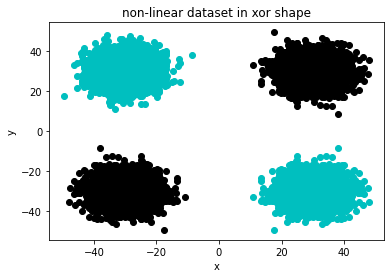

In [74]:
Pos = np.random.normal(30,5,5000)
Neg = np.random.normal(-30,5,5000)
d1 = [(x,y) for x,y in zip(Pos,Neg)]
d2 =[(x,y) for x,y in zip(Neg,Pos)]
d3 =[(x,y) for x,y in zip(Pos,-1*(Neg))]
d4 =[(x,y) for x,y in zip(-1*(Pos), 1*(Neg))]
first = d1 + d2
second = d3 + d4
plt.plot([x for x,y in first], [y for x,y in first], 'co', label='1')
plt.plot([x for x,y in second], [y for x,y in second], 'ko', label='0')

plt.title('non-linear dataset in xor shape')
plt.xlabel('x')
plt.ylabel('y')

plt.show()